In [150]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
#LOADING ALL THE FILES
def load_csv_files(directory):
    dataframes = {}  # Dictionary to store dataframes
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            # Create the dataframe name from the file name (without .csv)
            df_name = file.replace('.csv', '')
            # Load the CSV into a dataframe
            dataframes[df_name] = pd.read_csv(os.path.join(directory, file))
    return dataframes

In [152]:
# Directory containing the CSV files
csv_directory = '..\database'

dataframes = load_csv_files(csv_directory)

for name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date']) 
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
    dataframes[name] = df.set_index('Date')  # Set Tanggal as index for alignment

In [153]:
# Define the stock combinations
portfolio_1 = ['BBCA', 'EXCL', 'ANTM', 'ARTO', 'BBRI']
portfolio_2 = ['BBCA', 'EXCL', 'ANTM', 'ARTO', 'BBRI', 'AMMN']

In [154]:
def compare_portfolio(stock_list1, stock_list2, dataframes, title_suffix, max_rows=357):
    portfolio1_data = pd.concat(
        {name: dataframes[name]['Change %'] for name in stock_list1 if name in dataframes},
        axis=1,
        join='inner'  # Align on overlapping dates
    ).dropna()  # Drop rows with any NaN values
    
    portfolio2_data = pd.concat(
        {name: dataframes[name]['Change %'] for name in stock_list2 if name in dataframes},
        axis=1,
        join='inner'  # Align on overlapping dates
    ).dropna()  # Drop rows with any NaN values
    
    portfolio1_data = portfolio1_data.head(max_rows)
    portfolio2_data = portfolio2_data.head(max_rows)
    
    # Calculate Portfolio's Cumulative Performance
    portfolio1_data['Portfolio Change%'] = portfolio1_data.mean(axis=1)
    portfolio2_data['Portfolio Change%'] = portfolio2_data.mean(axis=1)

    # Plot Combined Portfolio's Daily Volatility
    plt.figure(figsize=(12, 6))
    portfolio1_data['Portfolio Change%'].plot(color='blue', label='Portfolio A Change%')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f"Combined Portfolio Daily Volatility (Portfolio A Daily Volatility)")
    plt.xlabel("Date")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot Combined Portfolio's Daily Volatility
    plt.figure(figsize=(12, 6))
    portfolio2_data['Portfolio Change%'].plot(color='blue', label='Portfolio B Change%')
    plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f"Combined Portfolio Daily Volatility (Portfolio B Daily Volatility)")
    plt.xlabel("Date")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid()
    plt.show()

    initial_investment = 100
    cumulative_performance1 = (1 + portfolio1_data['Portfolio Change%'] / 100).cumprod() * 100
    cumulative_performance2 = (1 + portfolio2_data['Portfolio Change%'] / 100).cumprod() * 100
    plt.figure(figsize=(12, 6))
    cumulative_performance1.plot(color='orange', label='Cumulative Portfolio A Performance')
    cumulative_performance2.plot(color='green', label='Cumulative Portfolio B Performance')
    plt.title("Cumulative Portfolio Performance")
    plt.xlabel("Date")
    plt.axhline(initial_investment, color='red', linestyle='--', linewidth=1, label='Initial Investment')
    plt.ylabel("Portfolio Value (Indexed to 100)")
    plt.legend()
    plt.grid()
    plt.show()
    


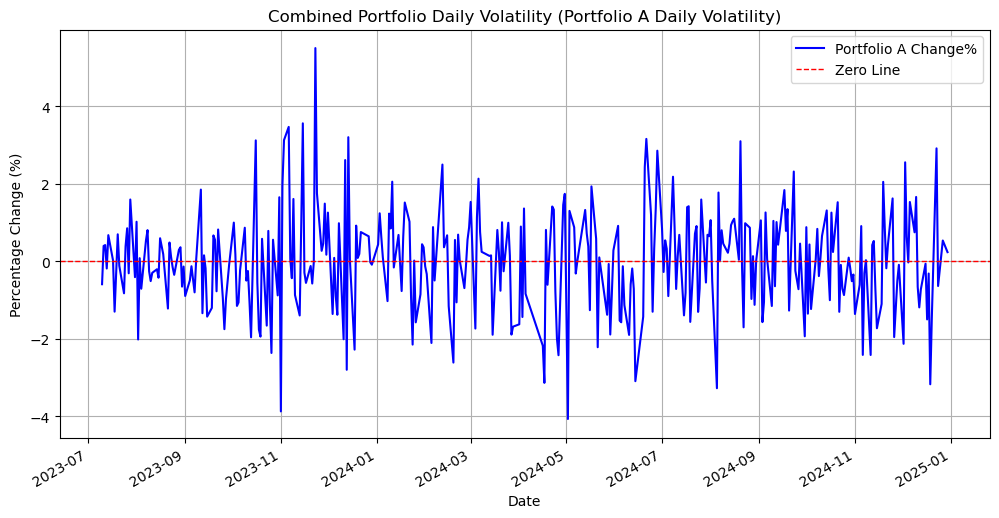

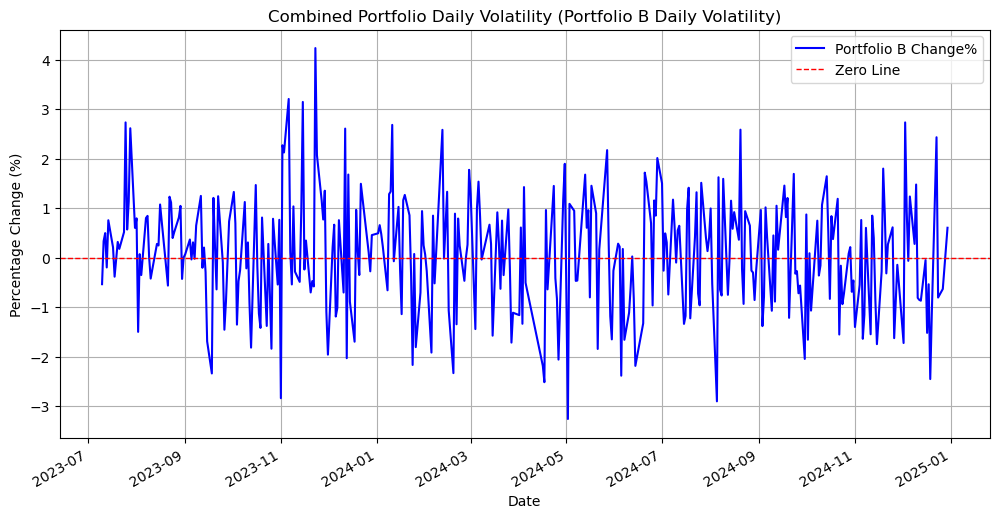

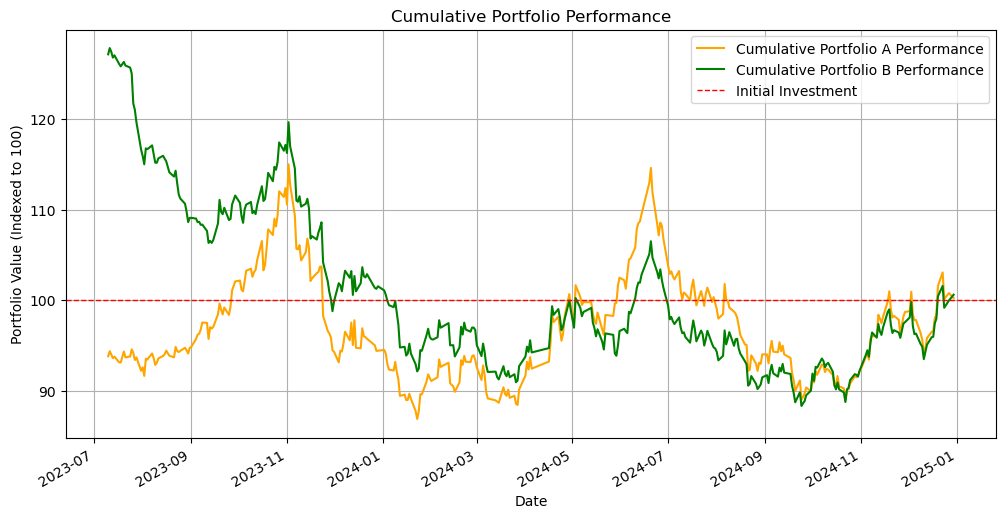

In [155]:
compare_portfolio(
    portfolio_1,
    portfolio_2,
    dataframes,
    max_rows=357,
    title_suffix="Portfolio A: BBCA, EXCL, ANTM, ARTO, BBRI vs Portfolio B: BBCA, EXCL, ANTM, ARTO, BBRI, AMMN"
)